### 파이썬으로 배우는 수익률과 포트폴리오 성과측정지수

파인드 알파 | Understanding of Risky Assets team 1 | 2nd Session

Chap 5.1. 수익률, 할인율

Chap 5.2. 위험프리미엄, 위험회피

Chap 5.3. 글로벌, 미국의 주식, 채권 위험포트폴리오 선례

Chap 5.4. 인플레이션과 실질이자율

In [ ]:
# 데이터 처리 모듈
import pandas as pd
import datetime as dt

# 행렬 등 통계 모듈
import numpy as np
from scipy.stats import norm

# 타입 어노테이션 모듈
from typing import *

# 주가지수, 시장주식가격 등을 읽어오는 모듈
  # !pip install pykrx
  # !pip install finance-datareader
from pykrx import stock
import FinanceDataReader as fdr

# 시각화 모듈
from matplotlib import font_manager, rc
  # !sudo apt-get install -y fonts-nanum
  # !sudo fc-cache -fv
  # !rm ~ /.cache/matplotlib -rf
import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns

In [ ]:
import platform

if platform.system() == "Darwin":
    rc("font", family = "AppleGothic")

elif platform.system() == "Windows":
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)

else:
    print("Unknown system")

Unknown system


##### 1. NPV(순현재가치)와 IRR(내부수익률)이 실제 시장 내 투자 기회의 수익성을 측정할 수 있을까

* 투자기간(현금흐름기간)별 내부수익률에 변동성이 있다면 어떻게 보완해야하는지 즉, 현금 유출입 시점과 규모에 영향을 받는다는 한계를 가지고 있음
* 주로 부동산 투자의사결정 관련 자본예산기법으로 활용되는바 real life의 데이터를 탐색하지 않기로 결정함

* $ 순현재가치, \ \Sigma_{현재시점}^{만기} 
{\frac{현금흐름(NOI)}{(1+할인율)^{투자기간}}} \ - \ 현금유출, \ 투자금 = \ 0 \ (할인율 = 내부수익률) $

* 자산운용사의 집합투자증권(펀드) 성과 측정

  예) REITs(부동산투자회사) 투자 시 기준

* 금융회사의 대출채권(여신상품) 수익률 측정


##### 2. 산술평균과 기하평균

* 가중(산술)평균의 대표적 예인 재무분야의 WACC
* 기하평균(곱의 평균)의 대표적인 예인 CAGR(기업 매출액 성장률)
* T년 동안 연도별 수익률을 통해 연평균 수익률을 산출하려면 기하평균 수익률을 사용하여야 함
*  _산술평균 수익률은 항상 기하평균 수익률보다 크거나 같음_


In [ ]:
class Average:
  def __init__(self, WACC = None, CAGR = None):
    self._WACC = WACC
    self._CAGR = CAGR
      # 생성자로 WACC, CAGR 변수 초기화
      # _ : [protected] 클래스 또는 상속클래스 내 메서드에서만 접근 허용하는 제어자
      # __ : [private] 클래스 내 메서드에서만 접근 허용하는 제어자

# ArithmetricAverage()
# 산술평균의 예

  def ArithmetricAverage(self, weight: np.array, cost: np.array) -> float:

    # 가중평균자본비용(WACC)
    WACC = sum(w*c for w, c in zip(weight, cost))
      # 투자자의 요구수익률 = 자기자본비용*자기자본비중(우선주, 보통주) + 타인자본비용*타인자본비중(회사채)
      # zip()으로 다수 리스트의 동일한 인덱스의 원소를 묶어 반복문 루프(for loop)을 활용
    
    return WACC


# GeometricAverage()
# 기하평균의 예
  
  def GeometricAverage(self, stockIndex: pd.DataFrame, column: int, p: int, f: int) -> float:

    # 연평균성장률 / 연복리수익률(CAGR) : 기업매출액, 주가지수
    HPR = stockIndex.iloc[f, column] / stockIndex.iloc[p, column]
      # 기간수익률 
    delta = stockIndex.index[f] - stockIndex.index[p]
    N = delta.days / 365
      # 기간
    CAGR = ( HPR ** (1/N) ) - 1

    return CAGR

In [ ]:
# 한국 주식 데이터 스크래핑
KOSPI_200102_231229 = stock.get_index_ohlcv_by_date("2020-01-01",
                                                    "2023-01-01", 
                                                    "1001")
  # 시작일, 종료일, 코스피지수 ticker는 1001
  # get_market_ohlcv_by_date() : 종목별 시세
  # get_shorting_status_by_date(), get_shorting_volumne_by_date() : 종목별 공매도 거래

# 한국 상장주식회사 종목코드
stockcode = pd.read_html("http://kind.krx.co.kr/corpgeneral/corpList.do?method=download", header=0)[0]

# 예시 : 재보험사 코리안리의 종목코드 003690
stockcode[["회사명", "종목코드"]][stockcode["회사명"] == "코리안리"]

,회사명,종목코드
1353,코리안리,3690


In [ ]:
# 코스피지수 연평균성장률 : (목표금액 / 투자금액)^(1 / 투자기간) - 1

average = Average()
  # 클래스 Average의 인스턴스, average를 객체로 선언

In [ ]:
CompoundAnnualGrowthRate = average.GeometricAverage(KOSPI_200102_231229, 
                                                    KOSPI_200102_231229.columns.get_loc("종가"), 
                                                    0, 
                                                    -1)
print(f"2020 ~ 2023년간 코스피지수의 연복리수익률은 {np.round(CompoundAnnualGrowthRate*100, 4)}%")

  # 에러 메시지
    # [UnboundLocalError] local variable 'CAGR' referenced before assignment
    # [TypeError] GeometricAverage() got multiple values for argument 'stockIndex'
    # [TypeError] GeometricAverage() takes 4 positional arguments but 5 were given
    # [TypeError] GeometricAverage() missing 1 required positional argument: 'f'

2020 ~ 2023년간 코스피지수의 연복리수익률은 0.9322%


##### 3. VaR, RAROC

* Value at Risk란 주어진 확률로 일정 기간동안 일어날 손실 규모로 수익률 분포가 정규분포를 따름을 전제로 함
  
  : 극단적 상황을 제외한 정상적(정구분포 가정) 상황에서 입을 수 있는 최대손실이지만 금융위기 기간을 표본으로부터 제외하는 것은 적합하지 않음

  : VaR = 보유금액 * 수익률의 표준편차 * 신뢰수준별 임계값 * sqrt(보유기간)

  $$ \sigma_p = \Sigma_i^n w_i^2 \sigma_i^2 + \Sigma_{i\ !=j} w_iw_j (p_{ij}\sigma_i\sigma_j) $$

* VaR의 목표기간은 어떻게 선택되어야 하는가? 

  : 포트폴리오 포지션 성과의 보고주기보다 길고, 재조정(리밸런싱) 주기보다 짧아야 함, 즉 포지션의 정상적 청산에 소요되는 기간을 감안하여 설정함

* 실제 VaR 모형을 이용한 리스크 관리는 어떻게 수행되는가?

  : 통상적으로 연초에 당해 연도에 준수되어야 할 VaR 한도를 설정한 후 연중에 실제 VaR이 한도를 넘지않도록 통제하는 방식, VaR 소진율은 관리지표 중 하나

* VaR 모수적 추정(분산-공분산 접근방식)
  
  자연로그 변환한 가격변화율 $ \frac{P_t-P_t-1}{P_t-1} = ln(\frac{P_t}{P_t-1}) $
  
  기하학적 시계열을 활용한 수익률 $ E(r_s) = \Sigma p_s \cdot r_s $

  기하평균 수익률 $ r_g = [(1+r_1)(1+r_2]) ⋯ (1+r_T)]^{\frac{1}{T}} - 1$
  
  수익률의 기댓값 $ E(r_g) = E(r_s) - \frac{1}{2}\sigma^2 $

  분산(투자자산의 변동성 위험), 각 시나리오의 확률 $ p_s $와 동일한 가중치를 갖는 투자수익의 **가중평균분산** $ \sigma^2 = \Sigma p_s[r_s - E(r_s)]^2 $

  VaR란 확률 a를 누적하는 손실의 최소금액 $ 1 - a = \int_∞^{VaR} p(s)r(s)ds $


In [ ]:
# One-Asset VaR Computation
class VaR():

  def __init__(self, KOSPI = None, Ticker = None, ticker = None,
               mean = None, std = None, from_date = None, to_date = None):
    self.KOSPI = KOSPI
    self.Ticker = Ticker
    self.ticker = ticker
    self.mean = mean
    self.std = std

    self.from_date = from_date
    self.to_date = to_date

# ImportIndex()
# 시장인덱스 데이터를 클래스 내부에 캡슐화하는 함수
  def ImportIndex(self, 
                  from_date: object, to_date: object,
                  html: object, ticker: object):

    # 2002년 01월 02일부터 2023년 02월 22일까지 KOSPI(유가증권시장지수)
    self.KOSPI = stock.get_index_ohlcv_by_date(from_date,
                                               to_date,
                                               "1001")
    self.from_date = from_date
    self.to_date = to_date

    # 한국 상장주식회사 종목코드
    stockCode = pd.read_html(html, header=0)[0]
    stockDict: Dict = {}

    n_index = stockCode[stockCode["회사명"] == ticker].index[0]
    stockDict[ticker] = stockcode.iloc[n_index, 1]
    
    return stockDict


# ImportTicker()
# 상장주식종목 데이터를 클래스 내부에 캡슐화하고, 누적 일간변동률을 시각화하는 함수

  def ImportTicker(self, 
                   ticker: object, tickerCode: object):

    self.Ticker = stock.get_market_ohlcv_by_date(self.from_date,
                                                 self.to_date,
                                                 tickerCode)
    self.ticker = ticker

    close = self.Ticker["종가"]
    rate = (close / close.shift(-1) -1) * 100
      # 종가 / 전체 데이터를 1칸 앞으로 이동 - 1
    rate.iloc[-1] = 0
      # 일간 변동률 마지막 인덱스에 0 지정
    self.Ticker["일간변동률"] = rate

    plt.figure(figsize = (8, 6))
    plt.xlabel("Date")
    plt.ylabel("Stock Price Change")
    plt.plot(self.Ticker.index, 
             self.Ticker["일간변동률"].cumsum(),
             color = "blue",
             label = ticker)
    plt.grid()
    plt.show()

    print(f"Distribution of {self.ticker} price fluctuation from {self.from_date} to {self.to_date}")
    self.mean = np.mean(self.Ticker["일간변동률"])
      # 일간변동률의 평균
    self.std = np.std(self.Ticker["일간변동률"])
      # 일간변동률의 표준편차
    x = np.linspace(self.mean - 3*self.std,
                    self.mean + 3*self.std)
      # 평균으로부터 왼쪽, 오른쪽으로 3*표준편차(99.7%)만큼 떨어진 값(지정된 구간)에서 균일한 간격으로 1차원 배열 반환
    self.Ticker["일간변동률"].hist(
        bins = 40,
        density = True, 
        histtype = "stepfilled",
        alpha = 0.5)
      # 일간변동률의 정규화된 히스토그램(빈도막대그래프)
    plt.plot(x,
            norm.pdf(x, self.mean, self.std), "orange")
      # 정규분포를 따르는 x의 확률밀도함수(probability density function)
      # 분포에서 값에 대응하는 확률값을 반환
    plt.rcParams["axes.unicode_minus"] = False
    plt.rc("font", family = "Malgun Gothic")      
      # 한글 깨짐 방지
    # plt.title(f"Distribution of {self.ticker} price fluctuation from {self.from_date} to {self.to_date}")
    plt.show()


# GetVaR() with Variance-Covariance approach (norm dist)
# GetVaR() with the Historical Simulation approach (quantile)

  def GetVaR(self):
  # 표본기간 : 1년, 2년, 3년, 5년, 10년, 15년
  # 목표기간 : 1일, 1주, 2주, 1월
  # 측정주기 : 표준측정법, 중복구간 측정법, 기간확장측정법
  # 투자자산 : 개별주식이 아닌 다중자산 클래스 포트폴리오를 input으로 받는다면

    VaR_significance_90 = norm.ppf(1-0.9, self.mean, self.std)
    VaR_significance_95 = norm.ppf(1-0.95, self.mean, self.std)
    VaR_significance_99 = norm.ppf(1-0.99, self.mean, self.std)
      # 각 분포에서 알파값(확률값 a)에 대응하는 값을 반환(percent point function)

    print(f"목표기간 {self.from_date}부터 {self.to_date}까지 {self.ticker} 주가변동률의 신뢰수준 90% 내 손실규모는 {np.round(VaR_significance_90, 4)}%")
    print(f"목표기간 {self.from_date}부터 {self.to_date}까지 {self.ticker} 주가변동률의 신뢰수준 95% 내 손실규모는 {np.round(VaR_significance_95, 4)}%")
    print(f"목표기간 {self.from_date}부터 {self.to_date}까지 {self.ticker} 주가변동률의 신뢰수준 99% 내 손실규모는 {np.round(VaR_significance_99, 4)}%")
    print(f"{self.ticker} 주가변동에 따른 실제 손실은 95% 신뢰구간 이내(5%의 오차를 감수하고) {np.round(VaR_significance_95, 4)}%를 초과하지 않는다.")

# def GetPortfolioVaR(self):

In [ ]:
Value_at_Risk = VaR()
  # 클래스 VaR의 인스턴스, Value_at_Risk를 객체로 선언

In [ ]:
Value_at_Risk.ImportIndex(
    from_date = "2021-01-01", to_date = "2023-02-24",
    html = "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download",
    ticker = "미래에셋증권"
)

{'미래에셋증권': 6800}

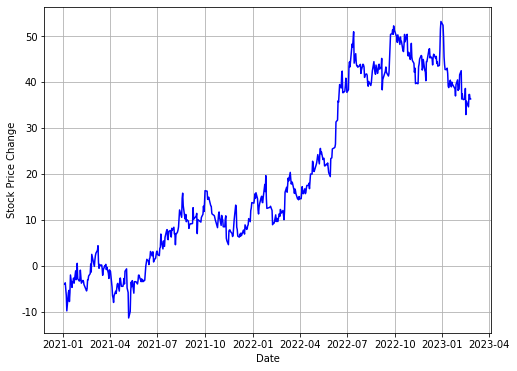

Distribution of 미래에셋증권 price fluctuation from 2021-01-01 to 2023-02-24


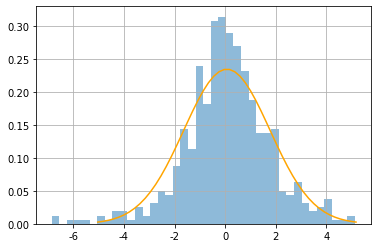

In [ ]:
Value_at_Risk.ImportTicker(
    ticker = "미래에셋증권",
    tickerCode = "006800"
)

In [ ]:
Value_at_Risk.GetVaR()

목표기간 2021-01-01부터 2023-02-24까지 미래에셋증권 주가변동률의 신뢰수준 90% 내 손실규모는 -2.1102%
목표기간 2021-01-01부터 2023-02-24까지 미래에셋증권 주가변동률의 신뢰수준 95% 내 손실규모는 -2.7278%
목표기간 2021-01-01부터 2023-02-24까지 미래에셋증권 주가변동률의 신뢰수준 99% 내 손실규모는 -3.8863%
미래에셋증권 주가변동에 따른 실제 손실은 95% 신뢰구간 이내(5%의 오차를 감수하고) -2.72781%를 초과하지 않는다.


##### 4. 단위당 초과성과를 나타내는 위험조정지표

* 샤프비율(자본시장선 CML 기반) $ S = \frac{수익률 - 무위험수익률}{수익률의 표준편차} = \frac{E(r_p) - r_f}{\sigma_p} $
  
  개별주식종목보다 투자자산 포트폴리오의 성과측정에 쓰이는 지표
  
* 젠센의 알파 (자본자산가격결정모형 CAPM 기반) $ a = 포트폴로오 수익률 - 기대수익률 $
* 트레이너지수 (위험보상비율) $ T = \frac{포트폴리오 수익률 - 무위험수익률}{포트폴리오 베타} $ 
* 정보비율

  $ \frac{포트폴리오 수익률 - 벤치마크}{표준편차} $
  
  $ \frac{젠센알파지수}{비체계적 위험(회귀식 잔차의 표준편차)} $

* 포트폴리오 손익에 영향을 주는 투자자산의 리스크 요인이 발생할 확률(시장변수, 거래상대방의 신용상태 변동성)
* 집합투자증권(펀드)의 위험도를 **"월간 비용조정 수익률의 표준편차", "시장위험베타(24개월 펀드의 수익률을 이용한 시계열 회귀분석으로 추정)", "비체계적위험", "하방위험", "왜도(펀드 수익률의 3차 적률)", "첨도(펀드 수익률의 3차 적률)"**로 측정할 수 있음
* 펀드의 성과는 평균초과수익률( t월의 i펀드 수익률에서 t월의 무위험 이자율을 차감), 샤프비율, 시장모형 알파 등으로 측정함

In [ ]:
"""

# 샤프 비율을 최대화하는 각 연도의 포트폴리오 가중치를 구하는 함수

stock: List = []
  # 투자할 종목코드 리스트 생성
return = np.log(raw[stock] / raw[stock].shift(1).dropna())
  # 시계열에 대한 로그 수익률 계산
(raw[stock] / raw[stock].iloc[0]).plot(figsize = (10, 8))
  # 주식종목에 대한 정규화된 시계열 그래프 시각화

weights = len(return.columns) * [1 / len(return.columns)]
  # 종목별 균등한 가중치

w = np.random.random(1000, len(stock))
w = ( w.T / w.sum(axis = 1).T )
  # 종목별 랜덤한 가중치 설정 (단, 공매도를 배제하고 100%를 채운다는 가정)

portfolio_return = np.dot(
  return.mean(),
  weights
) * 252
  # 가중포트폴리오 수익률

portffolio_volatility = np.dot(
  weights, np.dot(return.cov() * 252, weights)
) ** 0.5
  # 가중포트폴리오의 변동성
  # 행렬곱 연산자인 numpy.dot에 행(함수)으로 투자자산 수익률간 공분산 행렬, 벡터로 가중치
  # 공분산 행렬과 가중치 행렬곱 벡터에 가중치 행을 행렬곱한 루트값은 포트폴리오의 변동성

portfolio_sharpe = portfolio_return / portffolio_volatility
  # 샤프비율
portfolio_volatility_return = [portffolio_volatility, 
                               portfolio_return]  

plt.scatter(portfolio_volatility_return[:, 0], 
            portfolio_volatility_return[:, 1], 
            c = portfolio_sharpe, 
            cmap = "coolwarm")

plt.xlabel("Expected volatility")
plt.ylabel("Expected return")
	# 포트폴리오의 수익률, 변동성, 샤프비율에 대한 시각화
  
"""